# Import Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Import Fashion MNIST Data

In [5]:
# "Hello World" of Machine Learning program for Computer Vision
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore Data

In [7]:
train_images.shape # 60,000 images, images are represented by 28X28 pixels

(60000, 28, 28)

In [8]:
print len(train_labels)
train_labels  # Each label is integer between 0-9

60000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Data Manipulation

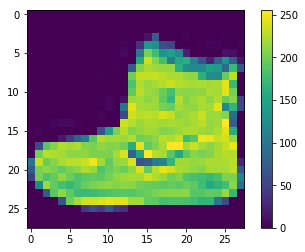

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [10]:
# Pixels values ranges 0-255, Scale these values to a range 0 to 1
train_images = train_images/255.0
test_images = test_images/255.0

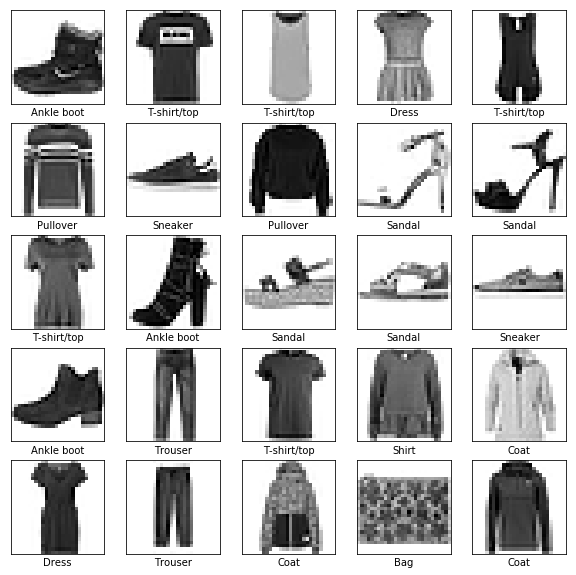

In [11]:
# Display first 25 images and show there labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build the Model

In [12]:
# Setup the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # transform the format of images from 2-d array to 1-d array
    keras.layers.Dense(128, activation=tf.nn.relu), # it has 128 dense hidden units
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 output nodes as it has 10 classes
])

# Compile the model
model.compile(optimizer= tf.train.AdamOptimizer(), 
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Fraction of image that is correctly classified

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.4963 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3734 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.3337 - acc: 0.8786
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3112 - acc: 0.8866
Epoch 5/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.2922 - acc: 0.8934


# Evaluate Accuracy

In [14]:
(test_loss, test_acc) = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
('Test accuracy:', 0.8728)


# Make Predictions

In [15]:
predictions = model.predict(test_images)

In [16]:
print predictions[0]
print np.argmax(predictions[0])

[4.4358449e-06 2.6489445e-07 5.3411828e-08 4.6396478e-09 7.0375341e-07
 3.3746182e-03 5.0187469e-07 4.1031692e-02 2.7857424e-05 9.5555979e-01]
9


# Plot some test images with their prediction label

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

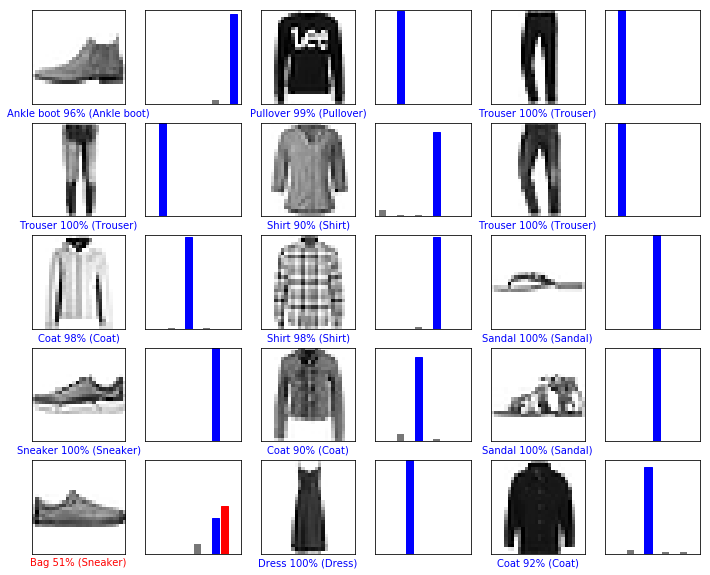

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)